In [1]:
from src.IOSystem import IOSystem
from src.SupplyChain import SupplyChain

In [2]:
database = IOSystem(year=2022, language="german").load()

2025-04-16 16:43:56,094 - INFO - Fast database was found - Loading...
2025-04-16 16:43:57,003 - INFO - Database has been loaded successfully in 0.908 seconds.


In [3]:
database.Index.sector_classification

['Wirtschaftssektor', 'Abschnitt', 'Unterabschnitt', 'Abteilung', 'Sektor']

In [4]:
supplychain = SupplyChain(database=database, Kontinent="Europa", Sector="Textilien")
supplychain

2025-04-16 16:43:57,489 - INFO - Calculating regional impact matrices...

2025-04-16 16:44:08,825 - INFO - Calculations successful.



SupplyChain(Number of Indices: 6200, Hierarchy levels: {'Kontinent': 'Europa', 'Region': None, 'Wirtschaftssektor': None, 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': None})

In [5]:
supplychain = SupplyChain(database=database, select=True)

In [6]:
supplychain

SupplyChain(Number of Indices: 1519, Hierarchy levels: {'Kontinent': 'Europa', 'Region': None, 'Wirtschaftssektor': 'Tertiär', 'Abschnitt': None, 'Unterabschnitt': None, 'Abteilung': None, 'Sektor': None})

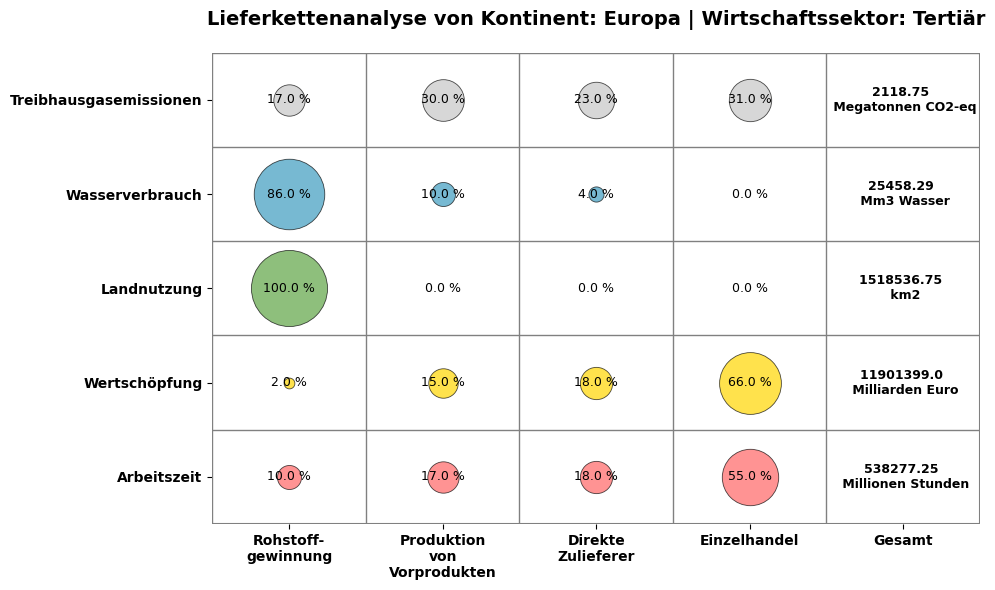

In [7]:
supplychain.plot_supply_chain(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"])

In [8]:
supplychain.calculate_all(impacts=["Treibhausgasemissionen", "Wasserverbrauch", "Landnutzung", "Wertschöpfung", "Arbeitszeit"], relative=False, decimal_places=5)

,Rohstoff-\ngewinnung,Produktion\nvon\nVorprodukten,Direkte\nZulieferer,Einzelhandel,Gesamt,Einheit,Farbe
Treibhausgasemissionen,353.29,645.90,483.69,652.95,2118.75,Megatonnen CO2-eq,#c7c7c6
Wasserverbrauch,21792.94,2562.92,1141.87,0.00,25458.29,Mm3 Wasser,#3e9cbf
Landnutzung,1518536.75,5501.74,822.11,0.00,1518536.75,km2,#5ea545
Wertschöpfung,225613.91,1791202.50,2119372.00,7839508.50,11901399.00,Milliarden Euro,#FFD700
Arbeitszeit,55567.99,92927.84,94483.98,296660.70,538277.25,Millionen Stunden,#ff6666


/Users/lukasharzbecker/exiobase_explorer/src/SupplyChain.py:444: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([f"{int(tick)}%" for tick in cbar.get_ticks()])


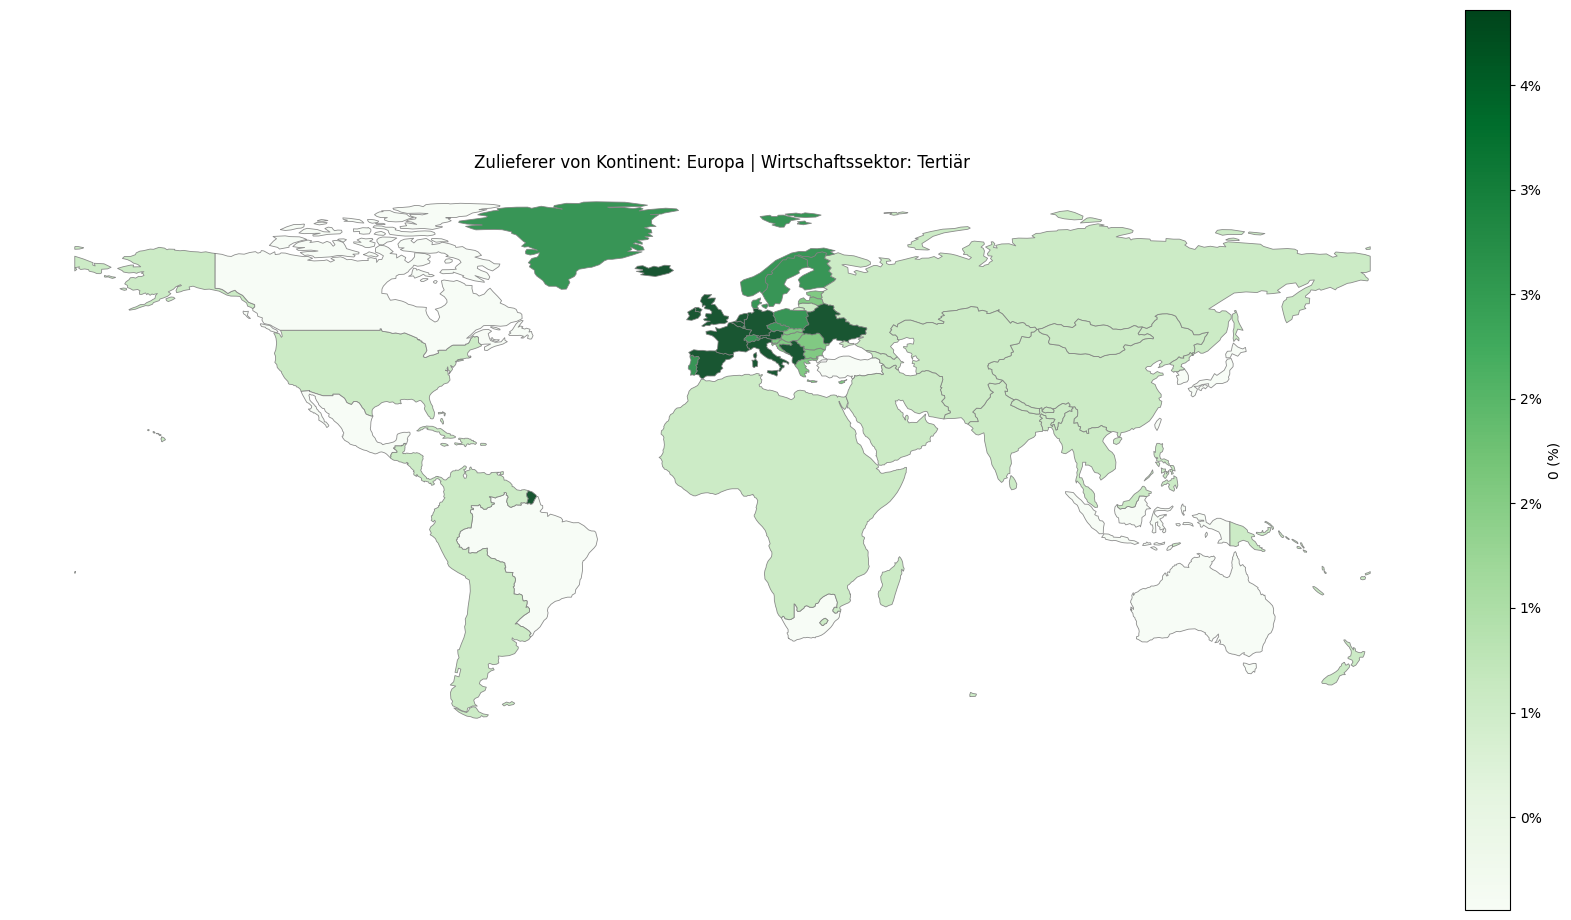

In [9]:
supplychain.plot_subcontractors(color="Greens")